# Fandango Seat Analytics - Model Development  

This notebook consists of the models run on the analytical dataset created from Fandango's historic seat booking dataset. This explores Linear models like Ordinary Least Squares, Linear Regression, Ridge Regression, Ensemble models like Random Forest and XGBoost

We will begin by importing necessary modules:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Wall time: 9.08 s


## Importing Dataset

In [5]:
%%time
data = pd.read_csv('ana_data_no_static_no_dynamic.csv')

Wall time: 12.5 s


In [6]:
data.shape

(846745, 38)

In [7]:
data.head()

,Unnamed: 0,total_capacity,reserved_seats,audi_size,seat_number,final_score,genre_Action,genre_Adventure,genre_Animation,genre_Anime,...,dayofweek,is_weekend,is_prime,movie_format_Digital 3D,movie_format_IMAX,movie_format_IMAX 3D,movie_format_Standard,showweek_Opening_Week,seat_row,seat_col
0,0,202,22,medium,A1,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,1
1,1,202,22,medium,A2,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,2
2,2,202,22,medium,A3,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,3
3,3,202,22,medium,A4,239.2,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,4
4,4,202,22,medium,A5,239.2,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,5


In [9]:
data['seat_number']=data['seat_number'].astype(str)


### Splitting Seat number into Row and Columns

In [10]:

seat = data['seat_number'].str.split('',n=2, expand=True)
data['seat_row'] = seat[1]
data['seat_col'] = seat[2]

In [11]:
#convert string to num
import string
di = {chr(i+64):i for i in range(1,27)}

In [12]:
data['seat_row'].replace(di,inplace=True)

In [13]:
data.head()


,Unnamed: 0,total_capacity,reserved_seats,audi_size,seat_number,final_score,genre_Action,genre_Adventure,genre_Animation,genre_Anime,...,dayofweek,is_weekend,is_prime,movie_format_Digital 3D,movie_format_IMAX,movie_format_IMAX 3D,movie_format_Standard,showweek_Opening_Week,seat_row,seat_col
0,0,202,22,medium,A1,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,1
1,1,202,22,medium,A2,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,2
2,2,202,22,medium,A3,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,3
3,3,202,22,medium,A4,239.2,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,4
4,4,202,22,medium,A5,239.2,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,5


In [14]:
#Range of seat score
print(data['final_score'].min())
print(data['final_score'].max())

121.0
539.9


In [15]:
data.head()

,Unnamed: 0,total_capacity,reserved_seats,audi_size,seat_number,final_score,genre_Action,genre_Adventure,genre_Animation,genre_Anime,...,dayofweek,is_weekend,is_prime,movie_format_Digital 3D,movie_format_IMAX,movie_format_IMAX 3D,movie_format_Standard,showweek_Opening_Week,seat_row,seat_col
0,0,202,22,medium,A1,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,1
1,1,202,22,medium,A2,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,2
2,2,202,22,medium,A3,157.8,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,3
3,3,202,22,medium,A4,239.2,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,4
4,4,202,22,medium,A5,239.2,1.0,1.0,0.0,0.0,...,5,1,0,0,0,0,0,0,1,5


In [16]:
#select the medium auditorium
data = data[data['audi_size'] == 'medium']

In [17]:
# drop genre columns and columns not required
data = data.drop(columns=['movie_format_IMAX','movie_format_IMAX 3D'],axis=1)

In [18]:
data = data.drop(columns=['genre_Western','genre_Sports & Fitness','Unnamed: 0','total_capacity','reserved_seats','audi_size','seat_number'],axis=1)

## Correlation Matrix

Wall time: 4.4 s


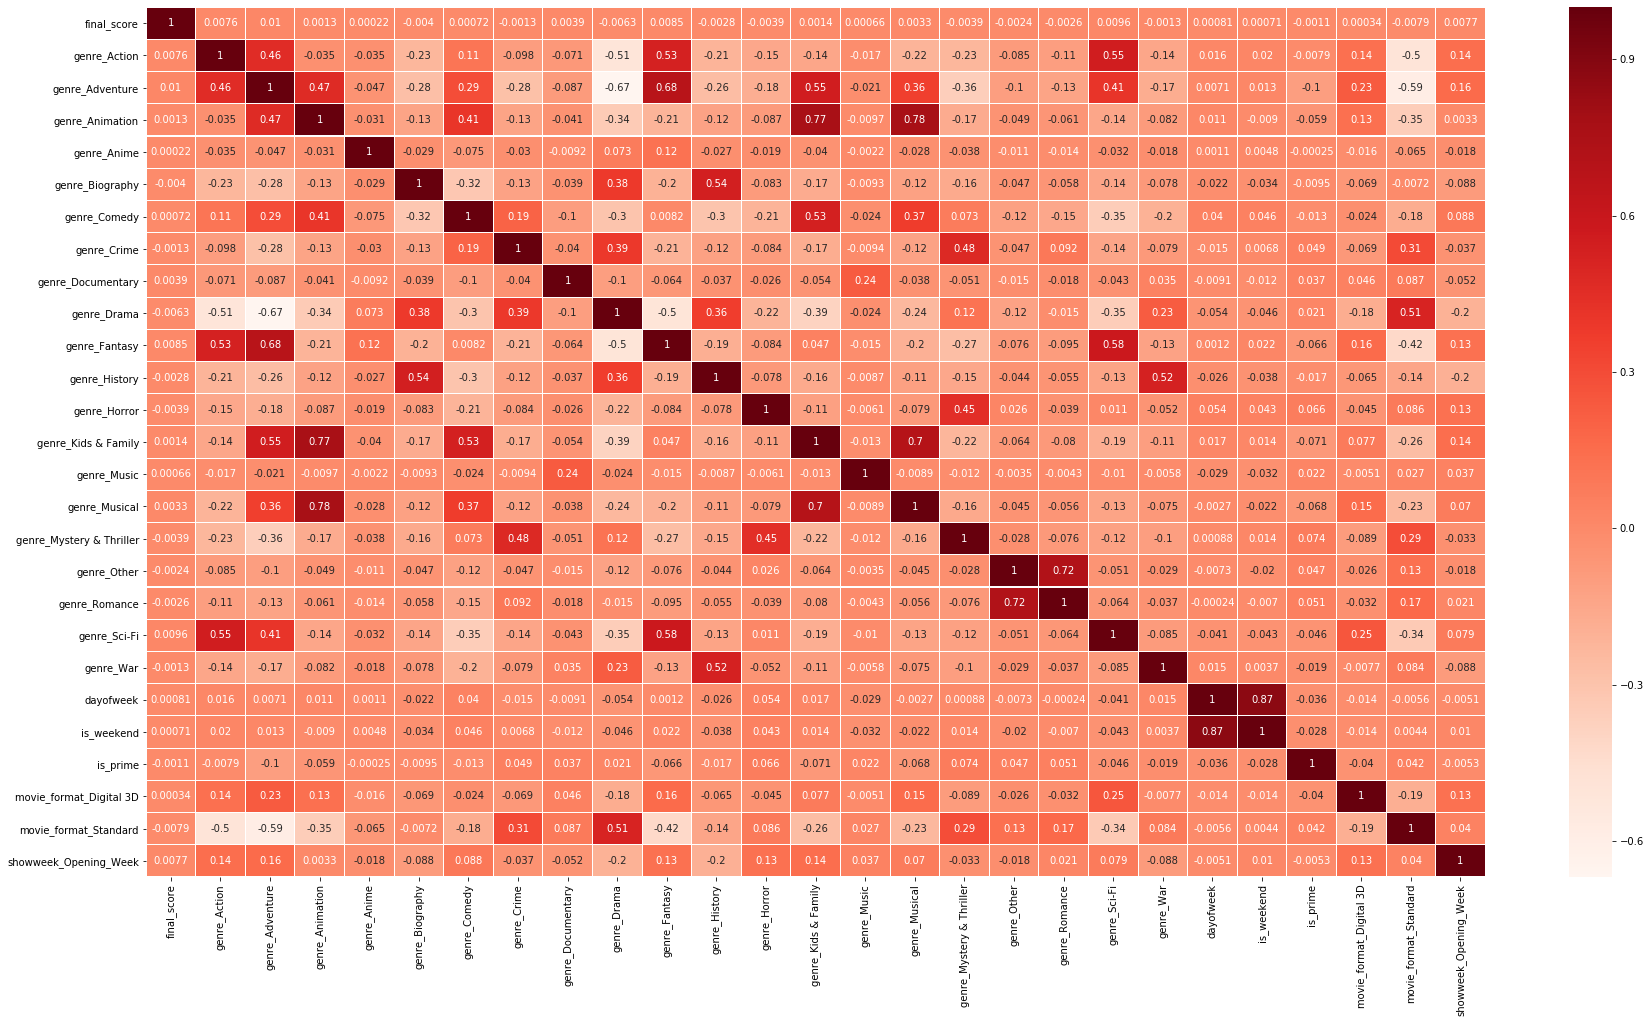

In [19]:
%%time
plt.figure(figsize=(30,16)) #heatmap
sns.heatmap(data.corr(), annot=True, linewidths=0.1, cmap='Reds')

Highly correlated Variables will be removed before running the Models:

genre_kid_family is correlated with genre_animation

genre_Musical is correlated with genre_animation

genre_musical is corrrelated with genre_kid_family

genre_romance with genre_other

is_weekend with dayofweek

In [20]:
# drop multicollinearity column

data = data.drop(columns=['genre_Music','genre_Other','genre_Animation','dayofweek'],axis=1)

## Test Train Split

We will split the dataset into training and testing dataset. The split will be 70% training and 30% testing dataset

In [21]:
# Split the model into testing and training the model
X = data.drop(['final_score'], axis = 1)
y = data.final_score

x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .3,
                                                  random_state=101)

## Linear Models

In [22]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [23]:
#adding an intercept to the statsmodel
x_train['intercept'] = 1
x_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,genre_Action,genre_Adventure,genre_Anime,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_History,...,genre_Sci-Fi,genre_War,is_weekend,is_prime,movie_format_Digital 3D,movie_format_Standard,showweek_Opening_Week,seat_row,seat_col,intercept
214181,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,0,0,1,1,11,20,1
793243,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,0,0,1,0,9,13,1
30410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,1,0,11,7,1
770211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,1,0,1,0,7,3,1
824735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0,0,3,6,1


In [24]:
#statsmodel Ordinary Least square
statsmodels.tools.add_constant(x_train, prepend=True)
mod = sm.OLS(y_train,x_train.astype(float))

res = mod.fit()


print(res.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:            final_score   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                 1.620e+04
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:00:50   Log-Likelihood:            -2.4700e+06
No. Observations:              428450   AIC:                         4.940e+06
Df Residuals:                  428425   BIC:                         4.940e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
genre_Action            

In [25]:
#vif scores to test high collinearity
vif = pd.DataFrame()
x_train=x_train.astype(float)
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

In [26]:

vif.round(1) #displays vif for all the features
#if VIf score for variables are greater than 5 that means it is highly correlated

,VIF Factor,features
0,3.9,genre_Action
1,6.7,genre_Adventure
2,1.2,genre_Anime
3,2.5,genre_Biography
4,3.6,genre_Comedy
5,2.3,genre_Crime
6,1.3,genre_Documentary
7,5.8,genre_Drama
8,4.4,genre_Fantasy
9,3.2,genre_History


In [27]:
#remove intercept columns for sklearn don't need it
x_train = x_train.drop(columns=['intercept'],axis=1)

# Linear Regression

In [28]:
#create a function to calculate the MAPE (Mean Absolute Percentage Error):
def mean_absolute_percentage_error(y,y_pred):
  y=np.array(y)
  y_pred=np.array(y_pred)
  return np.mean(np.abs((y-y_pred)/y)) * 100

In [29]:
#Linear Regression import modules

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
from sklearn.metrics import r2_score


In [30]:
%%time
#Run the mmodel on training dataset
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
#predict on training data
y_pred = regressor.predict(x_train)


#Print coefficients 
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})

# Print Error on training dataset
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_pred))

139.4856520851466
[ 1.6982392   0.78303813  7.51559872  3.16247136 -0.48704289 -0.22353746
 -3.96523445  1.10012743  0.2322256   0.11969942  2.90525691  1.83642473
  0.87169742  1.87129102  6.36617323 -0.8974176  -1.65434611  0.69693013
  0.25614982  3.47528563  1.90164386 -5.98311119 18.44874832  4.51027171]
Mean Absolute Error: 61.450281381369365
Mean Squared Error: 5954.042995732749
Root Mean Squared Error: 77.16244550124593
Mean Absolute Percentage Error: 21.048604710867888
Wall time: 1.35 s


In [31]:
%%time
#Predict on test dataset
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred2 = regressor.predict(x_val)

#Print coefficients 
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred2})

#Error on validation dataset
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred2)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_val,y_pred2))

139.4856520851466
[ 1.6982392   0.78303813  7.51559872  3.16247136 -0.48704289 -0.22353746
 -3.96523445  1.10012743  0.2322256   0.11969942  2.90525691  1.83642473
  0.87169742  1.87129102  6.36617323 -0.8974176  -1.65434611  0.69693013
  0.25614982  3.47528563  1.90164386 -5.98311119 18.44874832  4.51027171]
Mean Absolute Error: 61.306408000553525
Mean Squared Error: 5926.07943499017
Root Mean Squared Error: 76.9810329561131
Mean Absolute Percentage Error: 21.076541388500512
Wall time: 1.03 s


In [32]:
 #prints r square
r2_score(y_val, y_pred2)

0.47877871744301215

In [33]:
#store the predicted and test values of y variable in df
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred2})
df1 = df.head(25)

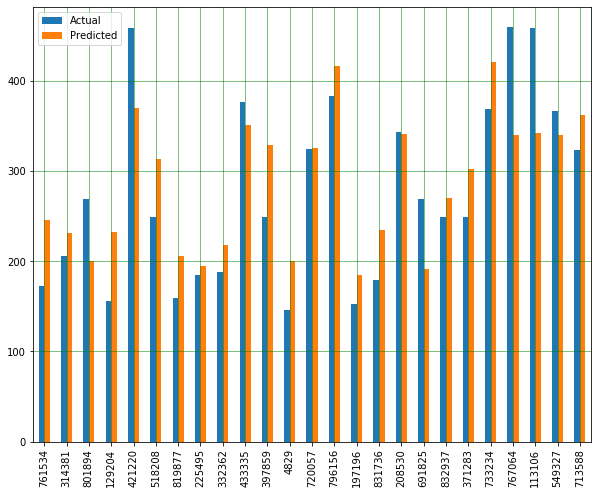

In [34]:
#Plot the Predicted and Actual Values from Linear Regression
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Feature: 0, Score: 1.69824
Feature: 1, Score: 0.78304
Feature: 2, Score: 7.51560
Feature: 3, Score: 3.16247
Feature: 4, Score: -0.48704
Feature: 5, Score: -0.22354
Feature: 6, Score: -3.96523
Feature: 7, Score: 1.10013
Feature: 8, Score: 0.23223
Feature: 9, Score: 0.11970
Feature: 10, Score: 2.90526
Feature: 11, Score: 1.83642
Feature: 12, Score: 0.87170
Feature: 13, Score: 1.87129
Feature: 14, Score: 6.36617
Feature: 15, Score: -0.89742
Feature: 16, Score: -1.65435
Feature: 17, Score: 0.69693
Feature: 18, Score: 0.25615
Feature: 19, Score: 3.47529
Feature: 20, Score: 1.90164
Feature: 21, Score: -5.98311
Feature: 22, Score: 18.44875
Feature: 23, Score: 4.51027


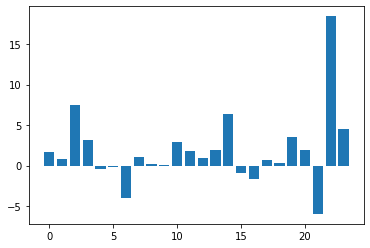

In [35]:
#Feature Importance of coefficients
from matplotlib import pyplot

importance = regressor.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest Regressor

In [36]:
#import all the modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict

In [37]:
%%time
#fit the model on training dataset
regr = RandomForestRegressor(max_depth=2, random_state=101, n_estimators=300)
regr.fit(x_train, y_train)
RandomForestRegressor()
#predict on training dataset
y_pred=regr.predict(x_train)

print(y_pred)
#print the error on traning data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred))


[404.58337515 404.58337515 404.58337515 ... 172.15606824 404.58337515
 404.58337515]
Mean Absolute Error: 40.08070867063172
Mean Squared Error: 2190.335277329055
RMSE: 46.801017909112346
MAPE: 13.252316457663255
Wall time: 1min 29s


In [38]:
#fitiing model 
regr = RandomForestRegressor(max_depth=2, random_state=101, n_estimators=300)
regr.fit(x_train, y_train)
RandomForestRegressor()
#predict test data
y_pred=regr.predict(x_val)
print(y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('MAPE:',mean_absolute_percentage_error(y_val,y_pred))

[172.15606824 172.15606824 212.71984658 ... 172.15606824 212.71984658
 404.58337515]
Mean Absolute Error: 40.018069180602446
Mean Squared Error: 2189.112023338655
RMSE: 46.78794741531899
MAPE: 13.251574720434789


In [39]:
#store the predicted and test values of y variable in df1
df1 = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})

df2 = df1.tail(25)

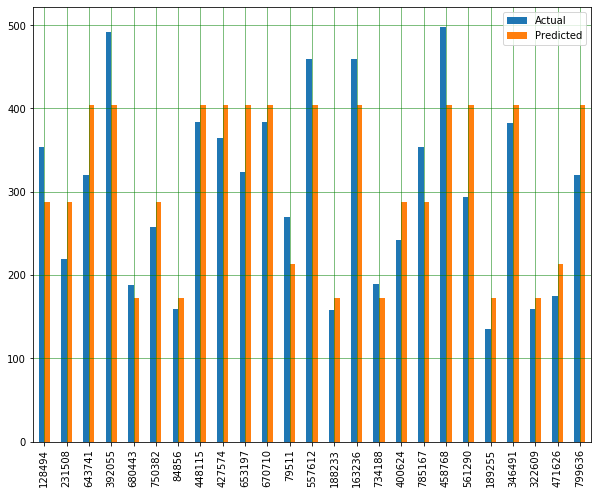

In [40]:
#Plot predicted and actual y vaues by Random Forest
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [41]:
#KFold validation 
#Hyperparameter tuning
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

n_estimator: 100

RMSE: 46.787956
MAPE: 13.251037
n_estimator: 150

RMSE: 46.787973
MAPE: 13.251549
n_estimator: 200

RMSE: 46.787964
MAPE: 13.251651
n_estimator: 250

RMSE: 46.787957
MAPE: 13.251449
n_estimator: 300

RMSE: 46.787947
MAPE: 13.251575
n_estimator: 350

RMSE: 46.787944
MAPE: 13.251818
n_estimator: 400

RMSE: 46.787955
MAPE: 13.251557
n_estimator: 450

RMSE: 46.787958
MAPE: 13.251589
n_estimator: 500

RMSE: 46.787960
MAPE: 13.251345


Text(0.5, 1.0, 'Random forest Regressor')

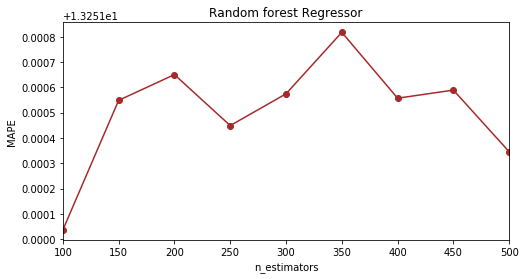

In [42]:
#create list of n_estimators
results=[]
n_estimators_options=[100,150,200,250,300,350,400,450,500]
#iterate over the different values of n_estimator 
for n in n_estimators_options:
  print('n_estimator: {}\n'.format(n))
  regr = RandomForestRegressor(max_depth=2, random_state=101, n_estimators=n)
  regr.fit(x_train, y_train)
  
  y_pred=regr.predict(x_val)

  #RMSE
  
    
  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  mape = mean_absolute_percentage_error(y_val,y_pred)
  print("RMSE: %f" % (rmse))
  print("MAPE: %f" % (mape))

  results.append(mape)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color="brown",marker='o')

plt.xlabel("n_estimators")
plt.ylabel("MAPE")
plt.title("Random forest Regressor")

#Print the performances and plot the error to select best hyperparameter

Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [73]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 20, num = 4)]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_leaf': min_samples_leaf,
#                }
# print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4]}


Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [74]:

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 83.1min


MemoryError: could not allocate 1835008 bytes

To determine if random search yielded a better model, we compare the base model with the best random search model.

In [127]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy



In [128]:
# base_model = RandomForestRegressor(n_estimators = 150, random_state = 101)
# base_model.fit(x_train, y_train)
# base_accuracy = evaluate(base_model, x_train, y_train)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, x_val, y_val)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

KeyboardInterrupt: 

## XG Boost Regressor


In [81]:
#!pip install xgboost
#To install xgboost module in the jupyter

In [43]:
#import modules
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Now we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains

In [45]:
#set the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 20, n_estimators = 300, random_state=101)

In [46]:
#convert seat_row and seat_col into numeric datatype to enter in the xgb model
x_train['seat_row'] = pd.to_numeric(x_train['seat_row'])
x_train['seat_col'] = pd.to_numeric(x_train['seat_col'])
x_val['seat_row'] = pd.to_numeric(x_val['seat_row'])
x_val['seat_col'] = pd.to_numeric(x_val['seat_col'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [50]:
#fit the model to training dataset

xg_reg.fit(x_train.astype(int),y_train)
#predict y_train 
preds = xg_reg.predict(x_train)

In [51]:
#print model performance and error
rmse = np.sqrt(mean_squared_error(y_train, preds))
print("RMSE: %f" % (rmse))

mape=mean_absolute_percentage_error(y_train,preds)

print ("MAPE: %f" %(mape))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, preds))  


RMSE: 11.938852
MAPE: 2.615790
Mean Absolute Error: 7.098776145561712
Mean Squared Error: 142.53618851841918


In [54]:
#fit the model to train data

xg_reg.fit(x_train.astype(int),y_train)
#predict y_val
preds = xg_reg.predict(x_val)

In [55]:

#print error and other metrics
rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))

mape=mean_absolute_percentage_error(y_val,preds)

print ("MAPE: %f" %(mape))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, preds))  


RMSE: 11.912018
MAPE: 2.629641
Mean Absolute Error: 7.113622074579648
Mean Squared Error: 141.89617556541373


In [56]:
#store actual vs predicted y values in the dataframe below
df_xgb = pd.DataFrame({'Actual': y_val, 'Predicted': preds})

df_xgb2 = df_xgb.head(25)

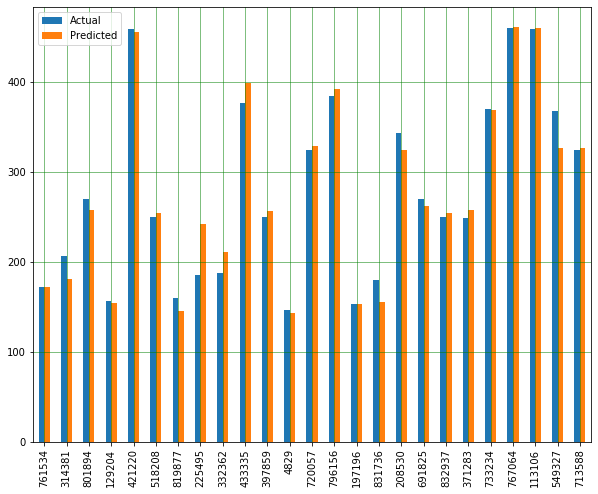

In [57]:
#plot predicted and actual y values as predicted by xgboost
df_xgb2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# k-fold Cross Validation using XGBoost

1. num_boost_round: denotes the number of trees you build (analogous to n_estimators)
2. metrics: tells the evaluation metrics to be watched during CV
3. as_pandas: to return the results in a pandas DataFrame.
4. early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
5. seed: for reproducibility of results.








We will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here we are using the Dmatrix object we created before.

In [ ]:
# params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=150,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[03:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**cv_results** contains train and test RMSE metrics for each boosting round

In [ ]:
# cv_results.head(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,295.384562,0.043897,295.381673,0.086678
1,267.495209,0.292509,267.453440,0.176978
2,242.304240,0.727746,242.301209,0.775289
3,219.992401,0.518815,219.958328,0.482395
4,200.520274,0.600242,200.526204,0.460730
5,181.637181,0.501989,181.627055,0.412381
6,164.301854,0.250887,164.301921,0.155341
7,149.112417,0.546387,149.098363,0.514113
8,135.365438,0.486477,135.366257,0.573496
9,123.999461,1.102638,124.006444,1.116645


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    19.223014
Name: test-rmse-mean, dtype: float64


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

n_estimator: 50

[14:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 29.999923
MAPE: 9.267881
n_estimator: 100

[14:44:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 19.137809
MAPE: 5.589472
n_estimator: 150

[14:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 1.0, 'XG Boost Regressor')

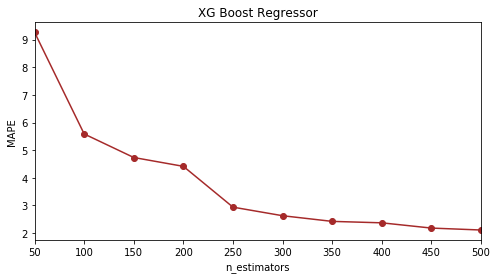

In [59]:
%%time
results=[]
n_estimators_options=[50,100,150,200,250,300,350,400,450,500]
for n in n_estimators_options:
  print('n_estimator: {}\n'.format(n))
  model=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 20,n_estimators=n, random_state=101)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_val)
  #RMSE
  

  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  mape = mean_absolute_percentage_error(y_val,y_pred)
  print("RMSE: %f" % (rmse))
  print("MAPE: %f" % (mape))

  results.append(mape)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color="brown",marker='o')

plt.xlabel("n_estimators")
plt.ylabel("MAPE")
plt.title("XG Boost Regressor")




#Visualize Feature Importance

In [60]:
import matplotlib.pyplot as plt

### Feature Importance - XGBoost

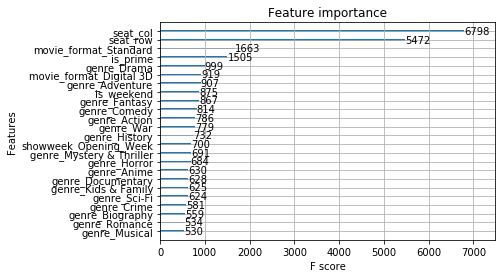

In [61]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


## Predicting A Seat Score Using XGBoost

In this part we will create a new dataframe with just one row , which will be the one we want to check the income for using the best decision tree built in the part above

Create a one row data set and save it as csv
Run and fit the Decision tree
Predict the income and print the results

In [46]:
pred_sample=data.iloc[[0]].to_csv('pred.csv', sep=',', encoding='utf-8', index=False)
pred_sample=pd.read_csv('pred.csv') # read above csv file as dataframe

In [88]:
pred_sample=pd.read_csv('pred.csv')

In [89]:
pred_sample.head()

,final_score,genre_Action,genre_Adventure,genre_Anime,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,...,genre_Romance,genre_Sci-Fi,genre_War,is_weekend,is_prime,movie_format_Digital 3D,movie_format_Standard,showweek_Opening_Week,seat_row,seat_col
0,157.8,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,7,8


In [90]:
#drop the y from pred_sample
pred_sample = pred_sample.drop(['final_score'], axis=1)

In [83]:
#pred_sample[['seat_row','seat_col','is_prime','genre_Horror','genre_Thriller','genre_Action']]=9,10,1,1,1,0
#pred_sample.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,final_score,genre_Action,genre_Adventure,genre_Anime,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,...,genre_Romance,genre_Sci-Fi,genre_War,is_weekend,is_prime,movie_format_Digital 3D,movie_format_Standard,showweek_Opening_Week,seat_row,seat_col
0,157.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1,1,0,0,0,9,1


In [91]:
predict_value = pred_sample.iloc[0]#store the predicted score

#xgb model is assigned to xg_reg
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 20, n_estimators = 450, random_state=101)


In [58]:
#to avoid datatype error in jupyter: is not required in Google colab
pred_sample['seat_row'] = pd.to_numeric(pred_sample['seat_row'])
pred_sample['seat_col'] = pd.to_numeric(pred_sample['seat_col'])
pred_sample['seat_row'] = pd.to_numeric(pred_sample['seat_row'])
pred_sample['seat_col'] = pd.to_numeric(pred_sample['seat_col'])

In [92]:
%%time
#Fit the model on x_train and y_train
xg_reg.fit(x_train.astype(int),y_train)
#predic the score of new row
preds = xg_reg.predict(pred_sample)

Wall time: 2min 47s


In [93]:
#store the predicted result as list and print
preds_list=preds.tolist()
preds=preds_list[0]


In [94]:
print("The Seat Score for Row 9, Col 10 is: ", preds)

The Seat Score for Row 9, Col 10 is:  464.4502258300781


## RidgeCV Regression

In [29]:
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as seabornInstance


In [96]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
clf.score(x_train, y_train)

0.475747432184175

In [32]:
print(clf.coef_)
y_pred = clf.predict(x_val)


#Print coefficients 
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})

#Error 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_val,y_pred))

[ 1.69793366  0.78269559  7.51243655  3.16214847 -0.48725737 -0.22339402
 -3.96477687  1.09997226  0.23245381  0.11956736  2.90474344  1.8363267
  0.87174068  1.87116654  6.36526888 -0.89755558 -1.65442456  0.69692946
  0.25614769  3.47490655  1.90135408 -5.98294199 18.44874343  4.51026984]
Mean Absolute Error: 61.30640867733838
Mean Squared Error: 5926.0793200546495
Root Mean Squared Error: 76.98103220959466
Mean Absolute Percentage Error: 21.07654314170282


## SVR Poly Kernel

Due to high runtime, this kernel was interrupted. Our final model is XGBoost for prediction and RidgeCV is the explanatory model

In [ ]:
from sklearn.svm import SVR

from sklearn import metrics

In [ ]:
#multidimensional SVR poly kernel
regressor = SVR(kernel='poly')
regressor.fit(x_train,y_train)


In [ ]:
#5 Predicting a new
y_pred = regressor.predict(x_val)

In [ ]:

errs = metrics.mean_squared_error(y, y_poly)

In [ ]:
def test_models(models):
    mse_list = []
    for model in models:
        mod = model[1]
        mod.fit(X_train, y_train)
        y_pred = mod.predict(x_val)
        mse = metrics.mean_squared_error(y_val, y_pred)
        mse_list.append(model[0], mse)
    return mse_list

# sample output: mse_list = [('MLP Regressor', 31.82), ('Decision Tree Regressor', 12.03)]